# Timing Synchronisation

The timing algorithm simulated below combines two algorithms. 

The Meyr-Oerder feed-forward algorithm is used to make an initial estimate of the timing phase. This drastically improves the lock-in time of the system by providing an initial estimate.

The operation then switches to a polyphase maximum-liklihood phase lock topology for tracking.
The bandwidth is quite low for good performance within the presence of a high amount of noise.

In [229]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../library')
import numpy as np
from utilities import phase_shift
from generic_modem import GenericModem
import matplotlib.pyplot as plt
from timing_recovery import TimingRecovery

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [230]:
data_length = 256
data = [np.random.randint(2) for _ in range(data_length)]
modem_bpsk_obj = GenericModem(  modulation_type = ["129", "QPSK 2/9"],
                                samples_per_symbol = 4,
                                pulse_factor = 0.5,
                                pulse_length = 33,
                                filename = "../library/DVB-S2X_constellations.json")
tx = modem_bpsk_obj.modulate(data)

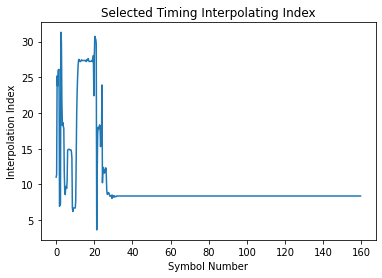

In [240]:
timing_sync_obj = TimingRecovery()

rx = []
index = []
error = []
rx_noise = []

mo_filtered = []

running_sum = 1
for tx_n in phase_shift(tx,0.75):
    rx_noise.append(tx_n + 0.5*(np.random.randn()+1j*np.random.randn()))
    
    rx += timing_sync_obj.update([rx_noise[-1]], high_snr=False)
    index.append(timing_sync_obj.poly_obj.controller_phase_index_)
    error.append(timing_sync_obj.poly_obj.error)
    
    mo_filtered.append(timing_sync_obj.mo_obj.sample_filtered)
    
plt.plot([_/4.0 for _ in range(len(index))], index)
plt.title('Selected Timing Interpolating Index')
plt.xlabel('Symbol Number')
plt.ylabel('Interpolation Index')
plt.show()

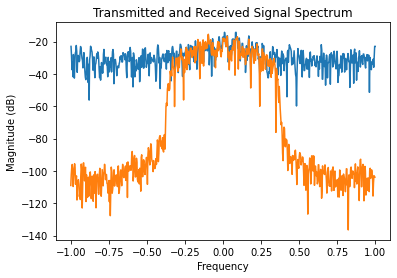

In [242]:
plt.magnitude_spectrum(rx_noise, scale='dB')
plt.magnitude_spectrum(tx, scale='dB')
plt.title('Transmitted and Received Signal Spectrum')
plt.show()

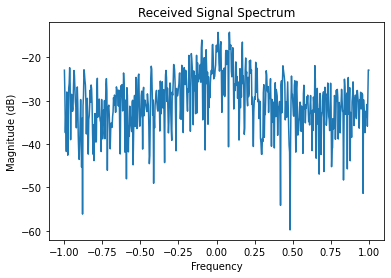

In [243]:
plt.magnitude_spectrum(rx_noise, scale='dB')
plt.title('Received Signal Spectrum')
plt.show()

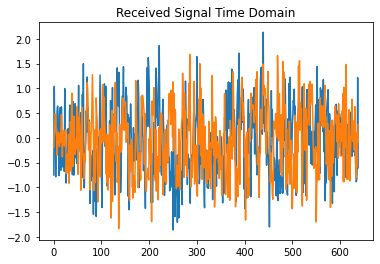

In [244]:
plt.plot(np.real(rx_noise))
plt.plot(np.imag(rx_noise))
plt.title('Received Signal Time Domain')
plt.show()